In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# Load Data
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print("Data loaded successfully.")
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Data loaded successfully.
Training set shape: (42000, 785)
Test set shape: (28000, 784)


In [ ]:
# Preview Data

print("First few rows of training data:")
display(train_df.head())

print("First few rows of test data:")
display(test_df.head())

First few rows of training data:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


First few rows of test data:


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Missing Values Check
print("Missing values in training data:", train_df.isnull().sum().sum())
print("Missing values in test data:", test_df.isnull().sum().sum())


Missing values in training data: 0
Missing values in test data: 0


In [ ]:
# Basic Info
display(train_df.head())
display(test_df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check for Missing Values
print("Missing values in training data:")
print(train_df.isnull().sum().sum())

print("Missing values in test data:")
print(test_df.isnull().sum().sum())

Missing values in training data:
0
Missing values in test data:
0


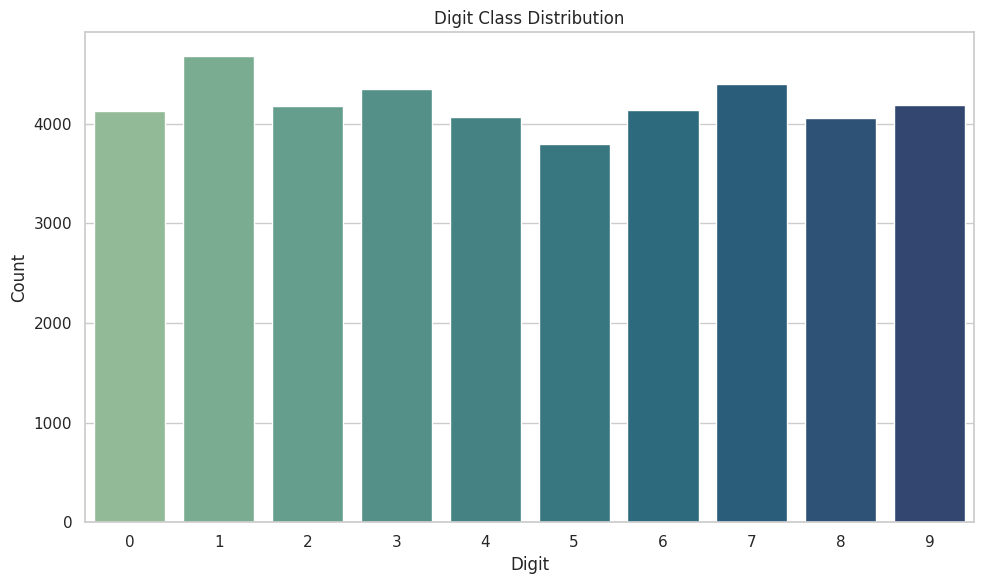

In [ ]:
# Target Distribution

plt.figure()
sns.countplot(x=train_df["label"], palette="crest")
plt.title("Digit Class Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

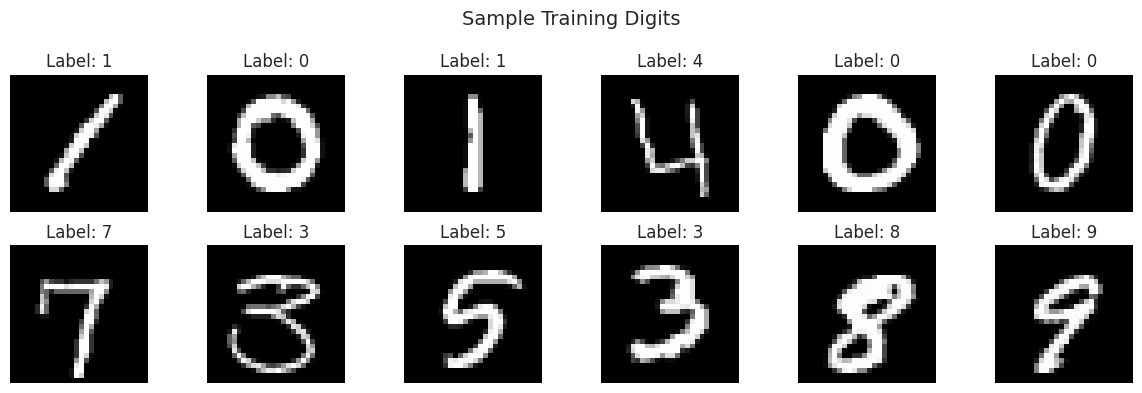

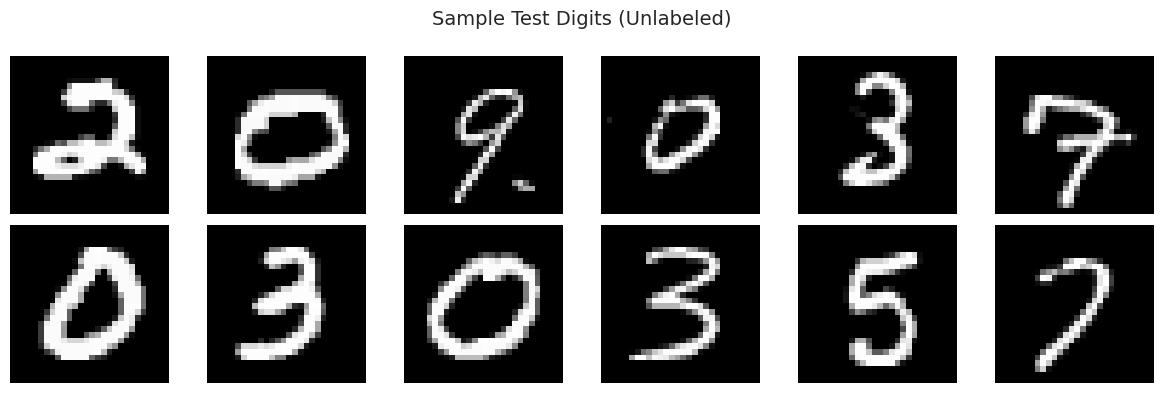

In [ ]:
# Visualize Sample Digits

def plot_digits(images, labels=None, num=12, title="Sample Digits"):
    """
    Display a grid of digit images.

    Parameters:
    - images: ndarray of shape (n, 784)
    - labels: optional array of labels
    - num: number of images to show
    """
    plt.figure(figsize=(12, 4))
    for i in range(num):
        plt.subplot(2, num // 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        if labels is not None:
            plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Extract raw image arrays
X_train = train_df.drop("label", axis=1).values
y_train = train_df["label"].values
X_test = test_df.values

plot_digits(X_train, y_train, title="Sample Training Digits")
plot_digits(X_test, labels=None, title="Sample Test Digits (Unlabeled)")

In [ ]:
# Pixel Value Summary

X_pixels = train_df.drop("label", axis=1)

pixel_mean = X_pixels.mean().mean()
pixel_std = X_pixels.stack().std()
pixel_min = X_pixels.min().min()
pixel_max = X_pixels.max().max()

print(f"Pixel Mean: {pixel_mean:.2f}")
print(f"Pixel Std Dev: {pixel_std:.2f}")
print(f"Pixel Range: {pixel_min} to {pixel_max}")

Pixel Mean: 33.41
Pixel Std Dev: 78.68
Pixel Range: 0 to 255


In [ ]:
# Extract Features & Labels

X = train_df.drop("label", axis=1).values
y = train_df["label"].values
X_test = test_df.values

print("Extracted X, y, X_test")
print(f"X shape: {X.shape} | y shape: {y.shape} | Test shape: {X_test.shape}")

Extracted X, y, X_test
X shape: (42000, 784) | y shape: (42000,) | Test shape: (28000, 784)


In [ ]:
# Normalize Pixels

X = X / 255.0
X_test = X_test / 255.0

print(f"Normalized pixel values. Range now: {X.min():.1f} to {X.max():.1f}")


Normalized pixel values. Range now: 0.0 to 1.0


In [ ]:
# Reshape for CNNs (n, 784) ➜ (n, 28, 28, 1)

X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Reshaped for CNN input.")
print(f"X shape: {X.shape} | X_test shape: {X_test.shape}")


Reshaped for CNN input.
X shape: (42000, 28, 28, 1) | X_test shape: (28000, 28, 28, 1)


In [ ]:
# Split Train/Validation Set

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

print(f"Train/Val Split complete.")
print(f"Train: {X_train.shape}, Labels: {y_train.shape}")
print(f"Val:   {X_val.shape}, Labels: {y_val.shape}")

Train/Val Split complete.
Train: (37800, 28, 28, 1), Labels: (37800,)
Val:   (4200, 28, 28, 1), Labels: (4200,)


In [ ]:
# One-Hot Encode Labels (for CNN softmax)

y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)

print(f"One-hot encoding done. Sample: {y_train_cat[0]}")

One-hot encoding done. Sample: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


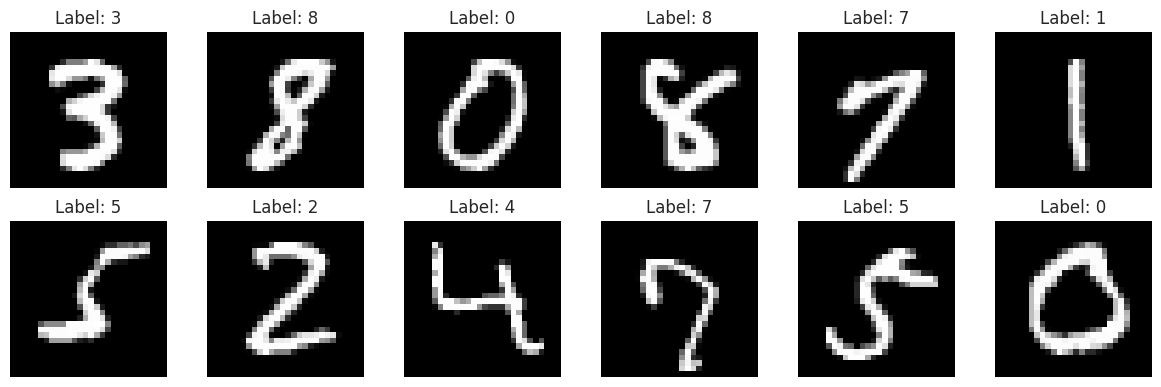

In [ ]:
# Visual Check

def plot_sample_grid(images, labels, num=12):
    plt.figure(figsize=(12, 4))
    for i in range(num):
        plt.subplot(2, num // 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_sample_grid(X_train, y_train_cat, num=12)


In [89]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [90]:
# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10-class classification
])


In [91]:
# Compile Model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [92]:
# Callbacks for Training Control
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.5, verbose=1)
]

In [93]:
# Train Model
history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    validation_data=(X_val, y_val_cat),
    epochs=30,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/30
591/591 - 25s - 43ms/step - accuracy: 0.8675 - loss: 0.4326 - val_accuracy: 0.9776 - val_loss: 0.0678 - learning_rate: 0.0010
Epoch 2/30
591/591 - 10s - 17ms/step - accuracy: 0.9579 - loss: 0.1366 - val_accuracy: 0.9860 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 3/30
591/591 - 10s - 17ms/step - accuracy: 0.9668 - loss: 0.1041 - val_accuracy: 0.9898 - val_loss: 0.0339 - learning_rate: 0.0010
Epoch 4/30
591/591 - 10s - 18ms/step - accuracy: 0.9748 - loss: 0.0809 - val_accuracy: 0.9907 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 5/30
591/591 - 10s - 17ms/step - accuracy: 0.9768 - loss: 0.0762 - val_accuracy: 0.9940 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 6/30
591/591 - 10s - 17ms/step - accuracy: 0.9787 - loss: 0.0682 - val_accuracy: 0.9926 - val_loss: 0.0241 - learning_rate: 0.0010
Epoch 7/30

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
591/591 - 10s - 18ms/step - accuracy: 0.9805 - loss: 0.0649 - val_accuracy: 0.9921 - val_l

In [ ]:
# Evaluate on Validation Set
val_loss, val_acc = model.evaluate(X_val, y_val_cat, verbose=0)
print(f"Final Validation Accuracy: {val_acc:.4f}")

Final Validation Accuracy: 0.9971


In [98]:
# Predict on Test Set
preds = model.predict(X_test, verbose=0)
labels = np.argmax(preds, axis=1)

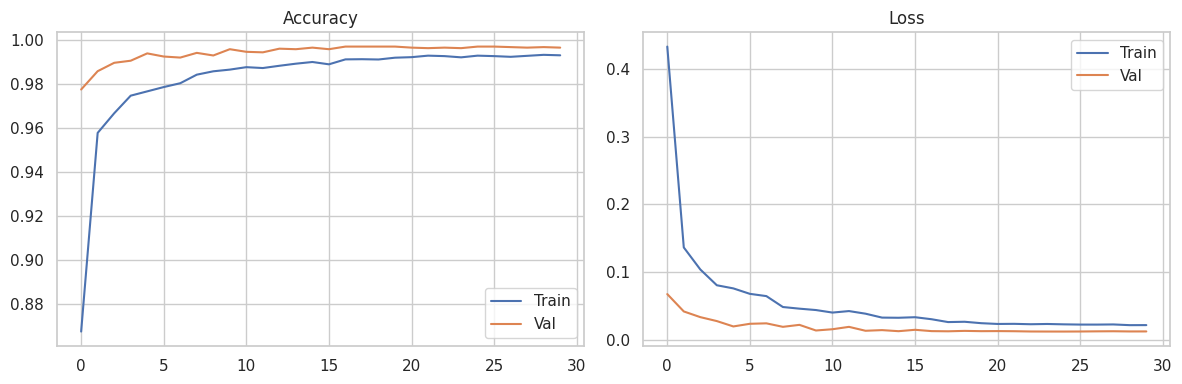

In [ ]:
# Visualize accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train")
    plt.plot(history.history["val_accuracy"], label="Val")
    plt.title("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train")
    plt.plot(history.history["val_loss"], label="Val")
    plt.title("Loss")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

In [100]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(labels) + 1),
    "Label": labels
})
submission.to_csv("cnn_submission.csv", index=False)
print("Submission file saved: cnn_submission.csv")

Submission file saved: cnn_submission.csv
